<a href="https://colab.research.google.com/github/ChoiSenn/Study/blob/main/data_analysis/exercise/ch12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **데이터 분석과 머신러닝**
## 2022-05-05  텐서플로로 따라하는 딥러닝

<br><br>

---

<br><br>

## 1. 가장 인기있는 머신러닝, 딥러닝 플랫폼 : 텐서플로

<br><br>

**텐서플로**는 머신러닝과 딥러닝을 위한 오픈소스 플랫폼이다.<br>
머신러닝과 딥러닝을 위한 플랫폼은 **텐서플로, 테아노, 파이토치, mxnet, 케라스, 사이킷런, NLTK** 등 여러 종류가 있다.<br>

이 중에서 텐서플로가 인기 있는 이유는 우수한 기능과 서비스를 제공하고 있으며, 병렬처리를 잘 지원하며 고급 신경망 네트워크 모델을 쉽게 구현할 수 있기 때문이다. 또한 웹상에서 머신러닝을 적용하기 위한 자바스크립트 라이브러리인 tensorflow.js라는 라이브러리를 제공하고 있으며 모바일과 임베디드 시스템을 위한 머신러닝 기능도 제공하고 있다.

<br>

텐서플로의 버전은 $__version__$ 속성을 통해 확인할 수 있다.

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.8.0


<br><br>

---

<br><br>

## 2. MNIST 데이터 가져오기

<br><br>

사이킷런과 마찬가지로 텐서플로에서도 학습 데이터를 제공하고 있다. 그 중 **MNIST**는 미국 인구 조사국에서 수집한 손글씨 숫자 데이터 집합을 기계학습에 적합하도록 수정한 이미지 집합이다. <br>

텐서플로에서는 위의 이미지를 제공하는 케라스라는 모듈을 포함하고 있는데, 이 이미지 데이터 집합을 **keras.datasets.mnist** 경로를 이용해 읽어올 수 있다. 읽어들인 데이터는 (이미지, 레이블)의 묶음으로 되어있으며 훈련용 이미지와 레이블, 테스트용 이미지와 레이블로 읽어올 것이다.

In [ ]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist  # MNIST 데이터를 학습용, 테스트 데이터로 구분하여 읽어옴
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print(train_images.shape)
print(test_images.shape)
print(train_labels.shape)
print(test_labels.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


<br>

읽어들인 데이터를 시각화하기 위해 train_images[0]을 이용하여 훈련 이미지의 가장 앞에 있는 데이터를 가져온 후, 이 데이터를 2중 for문을 사용하여 내부의 값을 출력한다.

In [ ]:
num = train_images[0]
for i in range(28):
  for j in range(28):
    print('{:4d}'.format(num[i][j]), end='')
  print()

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0
   0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0
   0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0
   0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0   0   0   0

<br><br>

---

<br><br>

## 3. MNIST 데이터 그리기

<br><br>

for문을 이용해 28x28 크기의 이미지 내부를 살펴보았다. 이미지의 한 픽셀은 0에서 255 사이의 값을 가진 회색조 이미지라는 것을 알 수 있었다.<br>

학습 데이터 집합에 있는 데이터 중에서 4개의 이미지를 가져와서 화면에 출력한다.

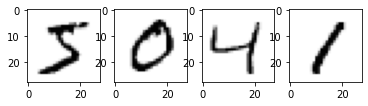

In [ ]:
fig = plt.figure()
ax1 = fig.add_subplot(1, 4, 1)
ax2 = fig.add_subplot(1, 4, 2)
ax3 = fig.add_subplot(1, 4, 3)
ax4 = fig.add_subplot(1, 4, 4)

ax1.imshow(train_images[0], cmap = 'Greys')
ax2.imshow(train_images[1], cmap = 'Greys')
ax3.imshow(train_images[2], cmap = 'Greys')
ax4.imshow(train_images[3], cmap = 'Greys')

이미지 파일 형태인 학습 데이터의 첫 4개 데이터의 형태가 5, 0, 4, 1의 숫자라는 것을 눈으로 확인할 수 있다. 이제 이 4개 이미지의 정답에 해당하는 train_labels 배열의 값을 출력한다.

In [ ]:
print(train_labels[:4])

[5 0 4 1]


훈련 이미지의 레이블이 5 0 4 1이라는 것을 확인할 수 있다.<br>

이런 이미지와 정답이 6만 개 주어져 있으므로, 우리는 다음과 같은 일을 시도해볼 수 있다.

1. 신경망 모델의 입력값으로 사용하기에 적절한 형태로 train_images 데이터를 전처리한다.
2. train_images 데이터를 학습시키기 위한 신경망 모델을 정의한다.
3. 신경망 모델의 활성화 함수, 학습을 위한 최적화 함수, 손실함수, 측정 방법을 정의한다.
4. 6만 개의 이미지로 이루어진 train_images 데이터를 심층 신경망 모델에 넣어서 train_labels 데이터의 숫자로 인식하도록 학습을 시킨다.
5. 1만 개의 이미지로 이루어진 test_image 데이터를 학습을 마친 모델의 입력으로 넣어서 이 모델의 정확도를 알아본다.
6. 모델의 성능을 개선하기 위해 모델의 신경망 노드망 층을 증가시킨다.

<br>

keras 서브 모듈의 다양한 기능을 사용한다면 이런 어려운 작업도 손쉽게 할 수 있다.<br>
**텐서플로는 다층 퍼셉트론을 만들고 학습시키는 번거로운 작업을 매우 쉽게 할 수 있다.**

<br>

1번 단계의 **전처리**는 이미 MNIST 데이터 집합을 생성할때 수행되었다고 볼 수 있다. 하지만 만약 데이터를 직접 수집할 때에는 손글씨 데이터를 스캐닝하는 과정에서 상당한 잡음이 들어가있을 것이다. 이 경우에는 잡을 제거하거나 크기를 보정하는 작업이 될 수 있다. 0에서 255 사이값을 가지는 회색조 이미지의 값의 범위를 0에서 1 사이의 값으로 변환시키는 작업도 필요하다.<br>

이러한 전처리는 train_images / 255, test_images / 255로 간단하게 할 수 있다. 이 전처리는 원래 픽셀이 가진 값의 범위 0~255를 0에서 1 사이의 값으로 조정하는 **정규화** 과정이다.<br>
이와 같이 0과 1 사이의 실수 값을 입력으로 사용하는 이유는 인공 신경망의 전체 수식에서 사용되는 값이 이산적인 값이 아닌 연속적인 값이기 때문이며, 따라서 실수값을 입력으로 사용하는 것이 더 나은 결과를 얻을 수 있기 때문이다.

In [ ]:
train_images, test_images = train_images / 255, test_images / 255

<br><br>

---

<br><br>

##4. 심층 신경망 모델을 만들고 하이퍼파라미터를 튜닝하자

<br><br>

2번 단계인 신경망 모델을 만드는 일을 도와주는 것이 텐서플로의 역할이다.<br>

흔히 말하는 **딥러닝**이라는 것은 **인공 신경망의 층을 계층적으로 깊이 쌓아서 만든 신경망 모델을 통해 학습을 하는 알고리즘**을 말한다.<br>

다층 퍼셉트론을 만들고 오차 역전파 알고리즘을 통해 학습하기 위해서는 대규모 행렬 계산이 필요한데, 텐서플로 코드를 이용해 간단히 구현할 수 있다.

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

**keras.Sequential()** 클래스는 입력층, 은닉층, 출력층이 존재하는 순차적 연결 구조를 가지는 신경망 모델을 생성한다. 이 순차적 신경망 모델을 생성할 때는 리스트 형식의 인자를 받는데 첫 항목은 일반적으로 입력층이 된다.<br>

순차적 심층 신경망은 입력값으로 2차원 배열을 사용할 수 없기 때문에 이를 **Flatten()** 클래스를 이용하여 1차원 객체로 만든다.<br>

다음으로 두 층에 대한 촘촘한 연결을 구성하는 **Dense 네트워크**가 나타난다. Dense는 학습을 위한 연결을 **밀집된 구조 혹은 완전 연결층**으로 한다는 의미이다. 네트워크의 입력은 앞 층에서 주어지기 때문에 몇 개의 출력으로 연결할지를 정하는 매개변수가 있다.<br>
여기서는 256개의 노드로 네트워크를 구성하므로 784x256 = 200,704 개의 연결 네트워크가 생성된다. **실제 생성되는 내부의 은닉층은 256개의 노드와 편향 노드가 추가되어 257개의 노드를 가진다.**<br>

1차원 배열로 변환된 784개의 값은 신경회로망을 통과하여 10개 중 하나의 범주로 분류된다. 이때 은닉층을 만드는 명령이 keras.layers.Dense().이다.<br>

이렇게 생성된 신경망은 1) **경사 하강법을 이용해 오차를 줄이는 방향으로 학습을 진행**하며, 2) **오차 역전파를 이용하여 가장 좋은 가중치와 편향값을 찾아나간다**.

In [ ]:
model.summary()  # 모델의 구조를 요약

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 256)               200960    
                                                                 
 dense_32 (Dense)            (None, 10)                2570      
                                                                 
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


784개의 입력이 Flatten 타입으로 들어오면, 중간에 256개의 은닉 노드가 출력층에 있는 10개의 노드와 연결된 구조임을 알 수 있다. 또한 모델에서 학습시켜야 할 파라미터의 수는 203,530개라는 정보도 보여준다.

<br><br>

---

<br><br>

## 5. 인공 신경망을 학습시켜 보자

<br><br>

신경망의 학습은 기본적으로 추측을 한 뒤에 정답과 비교하여 오차가 얼마인지 확인한 뒤에 오차를 줄이는 방법으로 연결의 강도를 조절하는 것이다. 이때 오차를 측정하는 방법과 이 오차를 줄이는 방법을 지정해야 한다.<br>

3번 단계인 활성화 함수, 학습을 위한 최적화 함수, 손실 함수, 측정 방법을 정의하는 절차는 훈련을 하기 전에 필요하므로 다음과 같이 설정해준다.

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # 최적화 기법, 손실 함수, 측정 방법

<br>

모델을 점점 더 좋은 상태로 만드는 것을 **최적화**라고 한다. 이를 위해서는 현재 모델이 얼마나 잘못되었는지를 알아야하는데 이 오차를 측정하는 것이 **손실함수**이다.<br>

모델이 완성되면 훈련 데이터와 정답 데이터를 주고 학습을 실시하면 된다. 4번 단계인 학습을 시작하게 하는 함수는 모델의 fit() 메소드인데, 훈련용 입력과 정답 레이블 데이터 셋을 차례로 주면 된다.<br>
훈련 데이터 모음으로 한 번 훈련하는 것을 에폭이라고 하는데, 이를 반복함으로써 모델은 더 좋은 상태로 바뀌게 된다. 반복훈련은 오차 역전파 알고리즘에 의해 이루어진다.<br>

아래에서는 5개의 에폭을 지정하였으므로 전체 데이터에 대한 학습을 5차례 실시하게 된다.

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2248 - accuracy: 0.9354
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0973 - accuracy: 0.9706
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0649 - accuracy: 0.9799
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0454 - accuracy: 0.9856
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0345 - accuracy: 0.9890


에폭이 진행되면서 매 단계에서의 손실값과 정확도가 출력된다. 훈련이 진행됨에 따라 예측의 부정확도를 나타내는 손실값은 감소하고, 예측의 정확성 값은 증가하는 것을 알 수 있다.

<br>

5번 단계에서는 학습 데이터가 아닌 테스트 데이터를 이용하여 이 모델이 정답 레이블을 잘 맞추는지 확인한다.

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 1s - loss: 0.0727 - accuracy: 0.9770 - 638ms/epoch - 2ms/step
0.9769999980926514


정확도 값이 0.9769으로 97.69%의 정확도로 정답을 예측했음을 알 수 있다.

<br>

신경망의 학습 데이터는 동일하지만 학습 때 사용되는 모델의 초기 가중치는 매번 랜덤하게 결정되므로 동일한 모델을 만들더라도 매번 정확도 값은 다르게 나타날 수 있다.<br>

이렇게 층을 쌓아나가며 여러 개의 은닉층을 가지는 신경망을 얻을 수 있고, 이를 **심층 신경망**이라고 한다.

<br><br>

---

<br><br>

##6. 인공 신경망의 성능을 개선해보자

<br><br>

6번 단계는 인공 신경망의 성능을 조금 더 개선하는 것이다.<br>

일반적으로 사용하는 방법은

1. 학습을 위한 은닉층을 더 깊게 만들기
2. 에폭을 증가시키기
3. 많은 학습용 데이터를 사용하기
4. 하이퍼파라미터 튜닝하기

등의 방법이 있다.<br>

최근 연구에 의하면 배치 사이즈를 키워거나 학습률을 서서히 크게 만드는 웜엎 등과 같은 전문적인 기법도 성능 개선에 영항을 준다고 한다.

<br>

1번 방법대로 학습을 위한 은닉층을 더 깊게 만들기 위하여 128개, 100개의 은닉층을 가지도록 신경망을 재구성한다.

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(100, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # 최적화 기법, 손실 함수, 측정 방법

train_images, test_images = train_images / 255, test_images / 255
model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=20)
print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.6520 - accuracy: 0.7935
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3194 - accuracy: 0.9031
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2390 - accuracy: 0.9269
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1848 - accuracy: 0.9437
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1498 - accuracy: 0.9545
Epoch 6/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.1263 - accuracy: 0.9614
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1093 - accuracy: 0.9664
Epoch 8/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0952 - accuracy: 0.9706
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0850 - accuracy: 0.9739
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - l

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(1256, activation='relu'),
                          keras.layers.Dense(512, activation='relu'),
                          keras.layers.Dense(256, activation='relu'),
                          keras.layers.Dense(100, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])  # 최적화 기법, 손실 함수, 측정 방법

train_images, test_images = train_images / 255, test_images / 255
model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=20)
print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 35s 18ms/step - loss: 2.3016 - accuracy: 0.1109
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 3/10
1875/1875 [==============================] - 34s 18ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 6/10
1875/1875 [==============================] - 34s 18ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 7/10
1875/1875 [==============================] - 34s 18ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 8/10
1875/1875 [==============================] - 34s 18ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 9/10
1875/1875 [==============================] - 33s 18ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 10/10
1875/1875 [==============================] - 34s 18m

그러나 은닉층의 개수를 더 늘리고 노드를 많이 만들면 문제가 발생한다.<br>

우선 훈련 파라미터가 많기 때문에 학습 시간이 많이 소요된다. 더 큰 문제는 테스트 데이터의 정확도가 고작 11% 밖에 되지 않는다는 점이다.<br>
이와 같이 단순한 구조로 층만 깊이 쌓을 경우, **출력 부분의 오차값을 이용하여 학습을 시키는 신경망 구조의 특성상 오차가 잘 전파되지 않는다.** 그리고 층이 깊어질수록 입력에 따라 다른 동작을 내도록 조정하기 어려워진다는 문제도 있다. 이 때문에 **모델의 층을 무작정 깊이 만드는 방법은 한계**가 있다.

<br><br>

---

<br><br>

##7. 새 이미지를 잘 학습하는지 알아보자

<br><br>

학습을 진행하는 이유는 이렇게 해서 얻은 모델을 새로운 데이터에 적용하기 위해서이다. <br>
이미지 분류를 위해 test_images 배열의 이미지들을 이용한다. 형태를 출력해보면 28x28 크기의 이미지 10000개를 가진 3차원 배열임을 알 수 있다.

In [ ]:
test_images.shape

(10000, 28, 28)

<br>

이 중 데이터 하나를 무작위로 선택하여 그려본다.

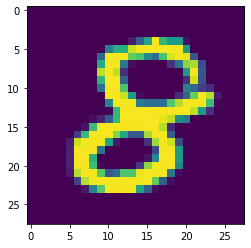

In [ ]:
randIdx = np.random.randint(0, 6000)
plt.imshow(test_images[randIdx])

<br>

3차원 배열 입력을 처리하는 모델을 만들었으나, test_images의 형태는 2차원이므로 newaxis를 이용하여 데이터를 3차원 데이터로 변환해준다.

<br>

이 데이터를 입력값으로 predict() 메소드에 넣으면 각각의 레이블과 일치하는 정도를 0에서 1 사이의 확률값으로 출력한다. 대부분이 매우 작은 값을 가지는데 비하여, 하나의 값 만이 높은 확률값을 갖는 것을 볼 수 있다.<br>

이제 pred.argmax() 메소드로 이 확률값들 중 가장 큰 값을 살펴본다. 가장 큰 출력을 갖는 노드와 실제 이미지의 숫자를 보았을때 제대로 인식한 결과라는 것을 알 수 있다.

In [ ]:
pred = model.predict(test_images[randIdx][np.newaxis, :, :])
pred

array([[2.9886301e-06, 5.5541500e-09, 3.9699080e-06, 4.5874081e-06,
        1.8559402e-05, 2.6272483e-07, 9.5509911e-08, 1.1407794e-08,
        9.9847716e-01, 1.4923313e-03]], dtype=float32)

In [ ]:
pred.argmax()

8

<br><br>

---

<br><br>

##8. 부드러운 최대값을 출력하는 소프트맥스 함수

<br><br>

가중치 값을 가진 벡터를 0에서 1 사이의 클래스별 확률값으로 변환하기 위해 사용하는 함수가 **소프트맥스 함수**이다.<br>

모델의 예측값을 소프트맥스 함수를 이용하여 각각의 확률로 계산한다. 이런 특징으로 인해 이 함수는 부드러운 최대값을 얻는다는 의미의 softmax라는 이름이 붙여졌다. 여기서 '부드럽다'는 것은 다른 출력값의 확률값도 유지한다는 뜻이다. 반면 max나 argmax 같은 함수는 각각 최대값 혹은 최대값을 갖게 하는 인자 하남나을 반환한다.

In [ ]:
import numpy as np

def softmax(a):
  exp_of_a = np.exp(a)  # 각각의 지수 함수
  sum_exp = np.sum(exp_of_a)  # 지수 함수값의 합
  y = exp_of_a / sum_exp  # 각각의 확률값을 구함
  return y

a = np.array([0.5, 4.1, 2.5, 5.6, 1.2])
print(a)  # 신경망의 예측값
print(softmax(a))  # 소프트맥스 함수 출력
print(np.max(softmax(a)))  # 소프트맥스 함수의 최대값

[0.5 4.1 2.5 5.6 1.2]
[0.00473882 0.17343248 0.03501541 0.77727047 0.00954281]
0.7772704668966948


<br><br>

---

<br><br>

##9. 직접 만든 이미지를 업로드하고 테스트하자

<br><br>

테스트 데이터 셋이 아닌 우리가 가진 임의의 데이터를 입력으로 제공하여 테스트한다.

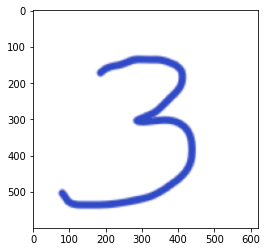

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

img = mpimg.imread('./myNumber.png')
plt.imshow(img)

<br>

이 이미지를 28x28 크기로 재단하고 회색조의 단일 채널 이미지로 바꿔주어야 한다. OpenCV 라이브러리를 이용하여 이미지를 변환한다.

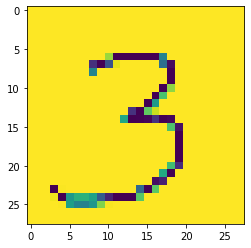

In [ ]:
import cv2

img = cv2.imread('./myNumber.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (28, 28))
plt.imshow(img)

<br><br>

---

<br><br>

## 10. 데이터의 전처리는 매우 중요하다

<br><br>

위와 같이 모델에 입력으로 사용하기 전에 필요한 작업을 **전처리** 작업이라고 한다. 인공지능 관련 프로젝트의 **전체 소요 시간의 80% 가량이 데이터 전처리 작업에 소요**된다고 한다.<br>

위에서 생성한 이미지를 모델에 입력으로 넣어보고 제대로 인식하나 살펴보자.

In [ ]:
pred = model.predict(img[np.newaxis, :, :])
pred.argmax()

3

3 이미지를 5로 인식한 모습이다. 문제점을 찾기 위해 이미지를 수치로 출력해보면 대부분의 수치값이 255로 되어있음을 알 수 있다.

In [ ]:
for i in range(28):
  for j in range(28):
    print('{:4d}'.format(img[i][j]), end='')
  print()

 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 229  80  80  80  80  80  80 158 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 104  80 124 249 255 255 255 255 255 143  85 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 159 255 255 255 255 255 255 255 255 255  80 255 255 255 255 255

이미지의 배경이 흰색이므로 255로 표현된 모습인 반면, 모델 학습에 사용한 이미지는 배경이 0으로 표현되어있다.<br>

데이터를 수정하고 predict() 메소드를 다시 실행한다.

In [ ]:
img = (255 - img) / 255
pred = model.predict(img[np.newaxis, :, :])
pred.argmax()

3

<br><br>

##도전문제 : 데이터를 직접 테스트

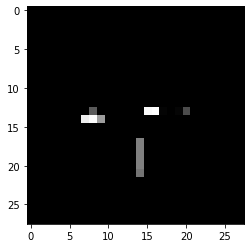

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

i4 = mpimg.imread('./num4.png', cv2.IMREAD_GRAYSCALE)
i4 = cv2.resize(i4, (28, 28))
i4 = (255 - i4) / 255
i5 = mpimg.imread('./num5.png', cv2.IMREAD_GRAYSCALE)
i5 = cv2.resize(i5, (28, 28))
i5 = (255 - i5) / 255
i6 = mpimg.imread('./num6.png', cv2.IMREAD_GRAYSCALE)
i6 = cv2.resize(i6, (28, 28))
i6 = (255 - i5) / 255
plt.imshow(i4)
#pred = model.predict(i4[np.newaxis, :, :])
#pred.argmax()

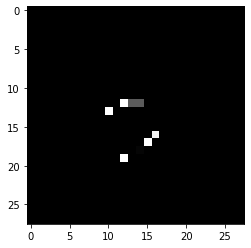

In [ ]:
#pred = model.predict(i5[np.newaxis, :, :])
#pred.argmax()
plt.imshow(i5)

이미지의 글자 크기가 작아서 그런지 제대로 인식이 되지 않은 모습이다.

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2

i4 = mpimg.imread('./n4.png', cv2.IMREAD_GRAYSCALE)
i4 = cv2.resize(i4, (28, 28))
i4 = (255 - i4) / 255
i5 = mpimg.imread('./n5.png', cv2.IMREAD_GRAYSCALE)
i5 = cv2.resize(i5, (28, 28))
i5 = (255 - i5) / 255
i6 = mpimg.imread('./n6.png', cv2.IMREAD_GRAYSCALE)
i6 = cv2.resize(i6, (28, 28))
i6 = (255 - i5) / 255

pred = model.predict(i4[np.newaxis, :, :])
pred.argmax()

InvalidArgumentError: ignored

이미지 인식은 제대로 시켰으나 오류의 원인을 찾지 못하였다...

<br><br>

---

<br><br>

##11. 붓꽃 데이터의 분류

<br><br>

필요한 모듈을 가져오고 붓꽃 데이터를 읽어온다.

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris

iris_dataset = load_iris()

<br>

150개의 데이터를 모두 학습에 사용하면 모델이 학습 데이터에만 최적화 될 수 있으므로 80%의 데이터만 학습에 사용하고 20%를 테스트용 데이터로 사용한다.

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
iris_dataset['data'], iris_dataset['target'], random_state=0, test_size=0.20)
# 학습 데이터와 테스트 데이터의 형태와 개별 훈련 데이터의 형태를 살펴보자.
print('훈련용 데이터의 형태:', x_train.shape)
print('훈련용 데이터의 레이블 형태:',y_train.shape)
print('테스트용 데이터의 형태:', x_test.shape)
print('테스트용 데이터의 레이블 형태:',y_test.shape)
print('개별 훈련 데이터의 형태:', x_train[0].shape)

훈련용 데이터의 형태: (120, 4)
훈련용 데이터의 레이블 형태: (120,)
테스트용 데이터의 형태: (30, 4)
테스트용 데이터의 레이블 형태: (30,)
개별 훈련 데이터의 형태: (4,)


<br>

다음으로 순차 모델을 생성하는 작업을 한다.<br>

model.fit() 메소드의 verbose는 학습의 진행 정도를 표시하는 모드이다.

In [ ]:
from tensorflow import keras

# 순차 모델을 생성하자
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (4,)),
    keras.layers.Dense(60, activation= 'relu'),
    keras.layers.Dense(3, activation= 'softmax'),
])

# 모델 컴파일
model.compile(optimizer='adam',\
              loss='sparse_categorical_crossentropy',\
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, batch_size=5, verbose=2)

Epoch 1/30
24/24 - 1s - loss: 0.8507 - accuracy: 0.5833 - 732ms/epoch - 30ms/step
Epoch 2/30
24/24 - 0s - loss: 0.6997 - accuracy: 0.6917 - 103ms/epoch - 4ms/step
Epoch 3/30
24/24 - 0s - loss: 0.6256 - accuracy: 0.6917 - 95ms/epoch - 4ms/step
Epoch 4/30
24/24 - 0s - loss: 0.5605 - accuracy: 0.7000 - 67ms/epoch - 3ms/step
Epoch 5/30
24/24 - 0s - loss: 0.5368 - accuracy: 0.8000 - 82ms/epoch - 3ms/step
Epoch 6/30
24/24 - 0s - loss: 0.4848 - accuracy: 0.7250 - 67ms/epoch - 3ms/step
Epoch 7/30
24/24 - 0s - loss: 0.4575 - accuracy: 0.8833 - 78ms/epoch - 3ms/step
Epoch 8/30
24/24 - 0s - loss: 0.4372 - accuracy: 0.7667 - 80ms/epoch - 3ms/step
Epoch 9/30
24/24 - 0s - loss: 0.4125 - accuracy: 0.8500 - 64ms/epoch - 3ms/step
Epoch 10/30
24/24 - 0s - loss: 0.3888 - accuracy: 0.9083 - 64ms/epoch - 3ms/step
Epoch 11/30
24/24 - 0s - loss: 0.3664 - accuracy: 0.9250 - 74ms/epoch - 3ms/step
Epoch 12/30
24/24 - 0s - loss: 0.3675 - accuracy: 0.9083 - 78ms/epoch - 3ms/step
Epoch 13/30
24/24 - 0s - loss: 0.3

순차 신경망의 학습이 종료되면 훈련 데이터에 대해 95% 정도의 분류 정확도를 가지는 것을 알 수 있다. 마지막으로 이 모델이 테스트 데이터를 잘 분류하는지 확인한다.

In [ ]:
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('붓꽃 데이터의 분류 정확도 :', eval_acc)

신경망 모델의 학습 결과 :
1/1 [==============================] - 0s 20ms/step - loss: 0.1502 - accuracy: 1.0000
붓꽃 데이터의 분류 정확도 : 1.0


<br><br>

---

<br><br>

##12. 분류 정확도를 높이기 위한 층을 추가한다

<br><br>

분류 정확도를 높이기 위한 층을 추가한다. 그리고 학습의 과정에서 손실값과 정확도가 어떻게 변하는지 관찰하기 위해 model.fit() 함수의 반환값을 hist 변수에 저장한다.

In [ ]:
model = keras.models.Sequential( [
    keras.layers.Flatten(input_shape = (4,)),
    keras.layers.Dense(60, activation= 'relu'),
    keras.layers.Dense(30, activation= 'relu'), # 새롭게 추가한 층
    keras.layers.Dense(3, activation= 'softmax'),
])

model.compile(optimizer='adam',\
              loss='sparse_categorical_crossentropy',\
              metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=30, batch_size=5, verbose=0)
print('신경망 모델의 학습 결과 :')
eval_loss, eval_acc = model.evaluate(x_test, y_test)
print('붓꽃 데이터의 분류 정확도 :', eval_acc)

신경망 모델의 학습 결과 :
1/1 [==============================] - 0s 213ms/step - loss: 0.0605 - accuracy: 1.0000
붓꽃 데이터의 분류 정확도 : 1.0


층을 깊게 만든 모델이 더 나은 성능을 보이는 것을 확인할 수 있다.

<br>

그리고 hist 변수를 다음과 같이 화면에 출력해보자. 가로축은 에폭으로, 30회의 에폭을 나타내며, 세로축은 손실값이다.

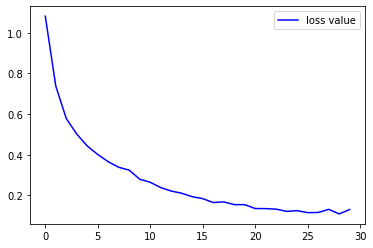

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], 'b-', label='loss value')
plt.legend()

에폭이 5회 진행될 즈음부터 손실값이 급격히 떨어지는 것을 볼 수 있으며 15회의 에폭이 진행된 이후에는 손실값의 감소가 크지 않다는 것을 알 수 있다.

<br>

다음으로는 정확도를 그래프로 출력해보자. 에폭이 진행됨에 따라 정확도 값이 증가하여 15회 이후의 에폭에서는 거의 1.0에 가까운 값을 가지는 것을 알 수 있다.

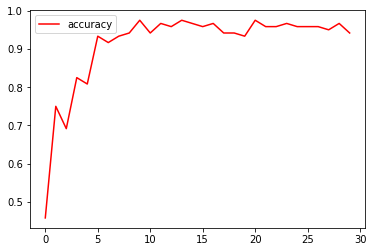

In [ ]:
plt.plot(hist.history['accuracy'], 'r-', label='accuracy')
plt.legend()

<br><br>

---

<br><br>

##13. 학습한 모델을 저장하고 불러오자

<br><br>

save() 메소드를 사용하여 학습을 마친 무델을 저장할 수 있다.

In [ ]:
model.save('./iris_60x30_model.h5')

모델의 크기와 정보를 !ls -l 명령으로 살펴본다.

In [ ]:
!ls -l

total 164
-rw-r--r-- 1 root root 60704 May  5 15:00 iris_60x30_model.h5
-rw-r--r-- 1 root root 60430 May  5 13:46 myNumber.png
-rw-r--r-- 1 root root  7313 May  5 14:22 n4.png
-rw-r--r-- 1 root root  6052 May  5 14:22 n5.png
-rw-r--r-- 1 root root  6982 May  5 14:22 n6.png
-rw-r--r-- 1 root root  3372 May  5 14:02 num4.png
-rw-r--r-- 1 root root  3069 May  5 14:02 num5.png
-rw-r--r-- 1 root root  4469 May  5 14:02 num6.png
drwxr-xr-x 1 root root  4096 May  3 13:42 sample_data


h5 파일은 HDF로 저장된 데이터 파일을 말하는데, 과학 데이터의 다차원 배열을 포함하는 파일 형식이다.

<br>

구글 드라이브를 마운트하면 구글 드라이브에도 저장할 수 있다.<br>

저장된 모델을 불러와서 사용하는 방법은 keras.models 모듈의 load_model() 함수를 사용하면 된다.

In [ ]:
loaded =keras.models.load_model('/content/iris_60x30_model.h5')
loaded.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 4)                 0         
                                                                 
 dense_8 (Dense)             (None, 60)                300       
                                                                 
 dense_9 (Dense)             (None, 30)                1830      
                                                                 
 dense_10 (Dense)            (None, 3)                 93        
                                                                 
Total params: 2,223
Trainable params: 2,223
Non-trainable params: 0
_________________________________________________________________


<br><br>

---

<br><br>

## 14. 수치값을 예측하는 딥러닝 모델

<br><br>

선형 회귀 함수를 찾는 문제를 위한 신경망을 구축해보자.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

x_train = np.array([[0], [1], [2]])
y_train = 3 * x_train + 1  # y = 3x + 1 꼴의 함수

x_test = np.array([[3], [4], [5]])
y_test = 3 * x_test + 1  # y = 3x + 1 꼴의 함수

print('x_train :', x_train.flatten(),' y_train :', y_train.flatten())
print('x_test :', x_test.flatten(),' y_test :', y_test.flatten())

x_train : [0 1 2]  y_train : [1 4 7]
x_test : [3 4 5]  y_test : [10 13 16]


이제 다음고 같은 순차 신경망을 만들자. model.add() 함수를 사용하여 4개의 노드를 가진 밀집층과 하나의 출력값을 내보내는 출력층을 갖고있다.

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(4, input_shape=(1, )))
model.add(keras.layers.Dense(1))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 4)                 8         
                                                                 
 dense_12 (Dense)            (None, 1)                 5         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


13개의 훈련 파라미터가 있는 단순한 모델임을 알 수 있다. 다음과 같이 하이퍼파라미터를 설정하고 학습을 시켜보자.

In [ ]:
#model.compile('SGD', 'mse')
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=30, batch_size=2)

Epoch 1/30
2/2 [==============================] - 1s 10ms/step - loss: 24.8220 - accuracy: 0.0000e+00
Epoch 2/30
2/2 [==============================] - 0s 16ms/step - loss: 16.9626 - accuracy: 0.0000e+00
Epoch 3/30
2/2 [==============================] - 0s 12ms/step - loss: 10.9379 - accuracy: 0.0000e+00
Epoch 4/30
2/2 [==============================] - 0s 10ms/step - loss: 4.6941 - accuracy: 0.3333
Epoch 5/30
2/2 [==============================] - 0s 10ms/step - loss: 1.4405 - accuracy: 0.3333
Epoch 6/30
2/2 [==============================] - 0s 10ms/step - loss: 0.6215 - accuracy: 0.3333
Epoch 7/30
2/2 [==============================] - 0s 11ms/step - loss: 0.3141 - accuracy: 0.3333
Epoch 8/30
2/2 [==============================] - 0s 12ms/step - loss: 0.1618 - accuracy: 0.3333
Epoch 9/30
2/2 [==============================] - 0s 20ms/step - loss: 0.1096 - accuracy: 0.3333
Epoch 10/30
2/2 [==============================] - 0s 15ms/step - loss: 0.0718 - accuracy: 0.3333
Epoch 11/30
2/

사용된 하이퍼파라미터를 살펴보면, 손실함수 loss는 평균 제곱 오차함수를 사용하며, 최적화를 위한 방법으로 확률적 경사 하강법을 사용하고 있다. 이는 신경망 학습 시에 전체 데이터를 이용하여 학습하는 경사 하강법과는 다르게 임의적으로 추출한 일부 데이터를 사용해서 가중치를 조절하는 경사 하강법의 변형된 방법이다. 이를 사용하는 이유는 가중치 조절의 속도 개선을 위해서이다.

In [ ]:
pred = model.predict(x_test)
print('x_test :', x_test.flatten(),' 예측 :', pred.flatten())

x_test : [3 4 5]  예측 : [ 9.819075 12.713411 15.607749]


10, 13, 16에 가까운 값으로, 선형 함수를 잘 흉내내는 것을 볼 수 있다.

<br><br>

---

<br><br>

#심화문제

<br><br>

## 1. 심층 신경망 모델의 하이퍼파라미터 중에서 최적화 알고리즘을 다음과 같이 바꾸고 난 후, 테스트 데이터에 대한 정확도를 각각 출력해보아라.

<br>

###1-1. RMSprop

In [ ]:
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=20)
print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2259 - accuracy: 0.9343
Epoch 2/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1003 - accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0725 - accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0586 - accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0477 - accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0422 - accuracy: 0.9883
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0353 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0283 - accuracy: 0.9925
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0247 - accuracy: 0.9934
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 

*정확도가 97.85% 정도이다.*

<br>

###1-2. Adadelta

In [ ]:
model.compile(optimizer='Adadelta', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=20)
print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0131 - accuracy: 0.9966
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0126 - accuracy: 0.9967
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0122 - accuracy: 0.9969
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0118 - accuracy: 0.9970
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0115 - accuracy: 0.9972
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0112 - accuracy: 0.9973
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0110 - accuracy: 0.9974
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0108 - accuracy: 0.9974
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0106 - accuracy: 0.9975
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.010

*정확도가 98% 정도이다.*

<br>

###1-3.Adagrad

In [ ]:
model.compile(optimizer='Adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=20)
print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0097 - accuracy: 0.9978
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088 - accuracy: 0.9981
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0082 - accuracy: 0.9982
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0078 - accuracy: 0.9984
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0075 - accuracy: 0.9984
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0072 - accuracy: 0.9985
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0070 - accuracy: 0.9985
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0068 - accuracy: 0.9986
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0066 - accuracy: 0.9986
Epoch 10/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.006

*정확도가 98.14% 정도이다.*

<br>

###1-4. Adamax

In [ ]:
model.compile(optimizer='Adamax', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=20)
print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0072 - accuracy: 0.9984
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0049 - accuracy: 0.9991
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0032 - accuracy: 0.9995
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0026 - accuracy: 0.9996
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0022 - accuracy: 0.9998
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0019 - accuracy: 0.9998
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0016 - accuracy: 0.9998
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0014 - accuracy: 0.9999
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.001

*정확도가 98.18% 정도이다.*

<br>

###1-5. Nadam

In [ ]:
model.compile(optimizer='Nadam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10, verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=20)
print(test_acc)

Epoch 1/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0221 - accuracy: 0.9930
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0202 - accuracy: 0.9938
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0164 - accuracy: 0.9948
Epoch 4/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0125 - accuracy: 0.9957
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0126 - accuracy: 0.9958
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0112 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0116 - accuracy: 0.9961
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0105 - accuracy: 0.9968
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0110 - accuracy: 0.9963
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - l

*정확도가 97.96% 정도이다.*

<br><br>

---

<br><br>

##2. f(z) = 2x + 3과 같은 함수를 모델링하는 심층 신경망을 만들어보자. 훈련용 입력값으로 2, 3, 4를 넣고 7, 9, 11을 목표값으로 하자.

1. 은닉층은 하나만 만들자.
2. 은닉층의 노드는 5개로 두자.
3. 적절한 하이퍼파라미터를 설정하자.
4. 이 모델이 5, 6, 7, 8의 입력을 주고 예측값을 출력해보자.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

x_train = np.array([[2], [3], [4]])
y_train = 2*x_train + 3

x_test = np.array([[5], [6], [7], [8]])
y_test = 2*x_test + 3
print('테스트 예측 결과 :', y_test.flatten())

model = keras.models.Sequential()
model.add(keras.layers.Dense(5, input_shape=(1, )))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=2)

pred = model.predict(x_test)
print('테스트 값 :', x_test.flatten(), '  예측값 :', pred.flatten())

테스트 예측 결과 : [13 15 17 19]
Epoch 1/10
2/2 [==============================] - 1s 7ms/step - loss: 51.6486 - accuracy: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 6ms/step - loss: 5.5612 - accuracy: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s 6ms/step - loss: 0.8811 - accuracy: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 0s 10ms/step - loss: 2.0503 - accuracy: 0.0000e+00
Epoch 5/10
2/2 [==============================] - 0s 5ms/step - loss: 1.5439 - accuracy: 0.0000e+00
Epoch 6/10
2/2 [==============================] - 0s 6ms/step - loss: 1.6254 - accuracy: 0.0000e+00
Epoch 7/10
2/2 [==============================] - 0s 5ms/step - loss: 0.8768 - accuracy: 0.0000e+00
Epoch 8/10
2/2 [==============================] - 0s 13ms/step - loss: 0.9671 - accuracy: 0.0000e+00
Epoch 9/10
2/2 [==============================] - 0s 13ms/step - loss: 0.5785 - accuracy: 0.0000e+00
Epoch 10/10
2/2 [==============================] - 0s 10ms/step - loss

*나와야 할 해답은 13, 15, 17, 19이고 예측값 결과는 12.68, 15.06, 17.44, 19.81으로 나왔다*.<br>
*epoch 값을 조정해보았는데 epoch 값을 30 이상으로 하였을 때에는 오히려 정확도가 떨어졌다.*

<br><br>

---

<br><br>

##3. 타이타닉호 생존자 예측 문제

<br>

###3-1. 타이타닉호의 생존자를 예측하는 심층 신경망을 만들자.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

train = pd.read_csv('/content/drive/MyDrive/Colab/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab/test.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
